In [1]:
import pandas
import prophet
import load_data
import importlib
importlib.reload(load_data)

<module 'load_data' from '/workspaces/covid/load_data.py'>

In [2]:
cases = load_data.load_cases()
nyc_cases = cases[cases.index.get_level_values(1).isin({"bronx", "kings", "new york", "queens", "richmond"})]
nyc_cases

New Positives  Cumulative Number of Positives  \
time       county                                                    
2020-03-21 bronx               367                            1218   
           kings               893                            2765   
           new york            522                            2066   
           queens              843                            2474   
           richmond            207                             522   
...                            ...                             ...   
2021-12-27 bronx              5302                          244271   
           kings              8770                          429054   
           new york           5372                          249399   
           queens             6635                          385920   
           richmond           1695                          109603   

                     Total Number of Tests Performed  \
time       county                                      
2020-03-21 bronx                                1044   
           kings                                1941   
           new york                             1370   
           queens                               1927   
           richmond                              645   
...                                              ...   
2021-12-27 bronx                               22384   
           kings                               47358   
           new york                            30732   
           queens                              32289   
           richmond                             9063   

                     Cumulative Number of Tests Performed  
time       county                                          
2020-03-21 bronx                                     4199  
           kings                                     7167  
           new york                                  7182  
           queens                                    6257  
           richmond                                  1584  
...                                                   ...  
2021-12-27 bronx                                  5976869  
           kings                                 12139269  
           new york                               9877243  
           queens                                 9962237  
           richmond                               2645144  

[3235 rows x 4 columns]

In [3]:
hosps = load_data.load_hospitalizations()
nyc_hosps = hosps[hosps.index.get_level_values(1).isin({"bronx", "kings", "new york", "queens", "richmond"})].groupby(level=[0, 1]).sum()
nyc_hosps

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (15,16,17,20,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Patients Currently Hospitalized  Patients Newly Admitted  \
time       county                                                               
2020-03-26 bronx                               736.0                    106.0   
           kings                              1032.0                    128.0   
           new york                           1500.0                    317.0   
           queens                             1249.0                    142.0   
           richmond                            216.0                      6.0   
...                                              ...                      ...   
2021-12-27 bronx                               451.0                     56.0   
           kings                               812.0                     84.0   
           new york                            776.0                    120.0   
           queens                              610.0                    123.0   
           richmond                            128.0                     27.0   

                     Patients Positive After Admission  Patients Discharged  \
time       county                                                             
2020-03-26 bronx                                 149.0                 65.0   
           kings                                 203.0                 61.0   
           new york                              224.0                101.0   
           queens                                193.0                158.0   
           richmond                                6.0                  6.0   
...                                                ...                  ...   
2021-12-27 bronx                                  41.0                 40.0   
           kings                                  72.0                 42.0   
           new york                               65.0                 72.0   
           queens                                 26.0                 39.0   
           richmond                                3.0                  5.0   

                     Patients Currently in ICU  \
time       county                                
2020-03-26 bronx                         185.0   
           kings                         179.0   
           new york                      459.0   
           queens                        222.0   
           richmond                       39.0   
...                                        ...   
2021-12-27 bronx                          73.0   
           kings                          89.0   
           new york                      124.0   
           queens                         37.0   
           richmond                       25.0   

                     Patients Currently ICU Intubated  Patients Expired  
time       county                                                        
2020-03-26 bronx                                178.0              18.0  
           kings                                152.0              28.0  
           new york                             382.0              24.0  
           queens                               214.0              30.0  
           richmond                              30.0               6.0  
...                                               ...               ...  
2021-12-27 bronx                                 25.0               7.0  
           kings                                 39.0              10.0  
           new york                              54.0               5.0  
           queens                                27.0              10.0  
           richmond                              13.0               1.0  

[3200 rows x 7 columns]

In [7]:
data = cases.join(hosps)
data

New Positives  Cumulative Number of Positives  \
time       county                                                       
2020-03-01 albany                   0                               0   
           allegany                 0                               0   
           broome                   0                               0   
           cattaraugus              0                               0   
           cayuga                   0                               0   
...                               ...                             ...   
2021-12-27 westchester           2049                          172563   
           westchester           2049                          172563   
           westchester           2049                          172563   
           wyoming                 17                            6109   
           yates                    3                            2325   

                        Total Number of Tests Performed  \
time       county                                         
2020-03-01 albany                                     0   
           allegany                                   0   
           broome                                     0   
           cattaraugus                                0   
           cayuga                                     0   
...                                                 ...   
2021-12-27 westchester                             9536   
           westchester                             9536   
           westchester                             9536   
           wyoming                                   59   
           yates                                     35   

                        Cumulative Number of Tests Performed  \
time       county                                              
2020-03-01 albany                                          0   
           allegany                                        0   
           broome                                          0   
           cattaraugus                                     0   
           cayuga                                          0   
...                                                      ...   
2021-12-27 westchester                               4308851   
           westchester                               4308851   
           westchester                               4308851   
           wyoming                                    120827   
           yates                                       67066   

                        Patients Currently Hospitalized  \
time       county                                         
2020-03-01 albany                                   NaN   
           allegany                                 NaN   
           broome                                   NaN   
           cattaraugus                              NaN   
           cayuga                                   NaN   
...                                                 ...   
2021-12-27 westchester                             16.0   
           westchester                              0.0   
           westchester                             62.0   
           wyoming                                  4.0   
           yates                                    1.0   

                        Patients Newly Admitted  \
time       county                                 
2020-03-01 albany                           NaN   
           allegany                         NaN   
           broome                           NaN   
           cattaraugus                      NaN   
           cayuga                           NaN   
...                                         ...   
2021-12-27 westchester                      5.0   
           westchester                      0.0   
           westchester                     10.0   
           wyoming                          0.0   
           yates                            0.0   

                        Patients Positive

<AxesSubplot:label='7097d26d-6eed-4b9e-9984-a28f4bd84214'>

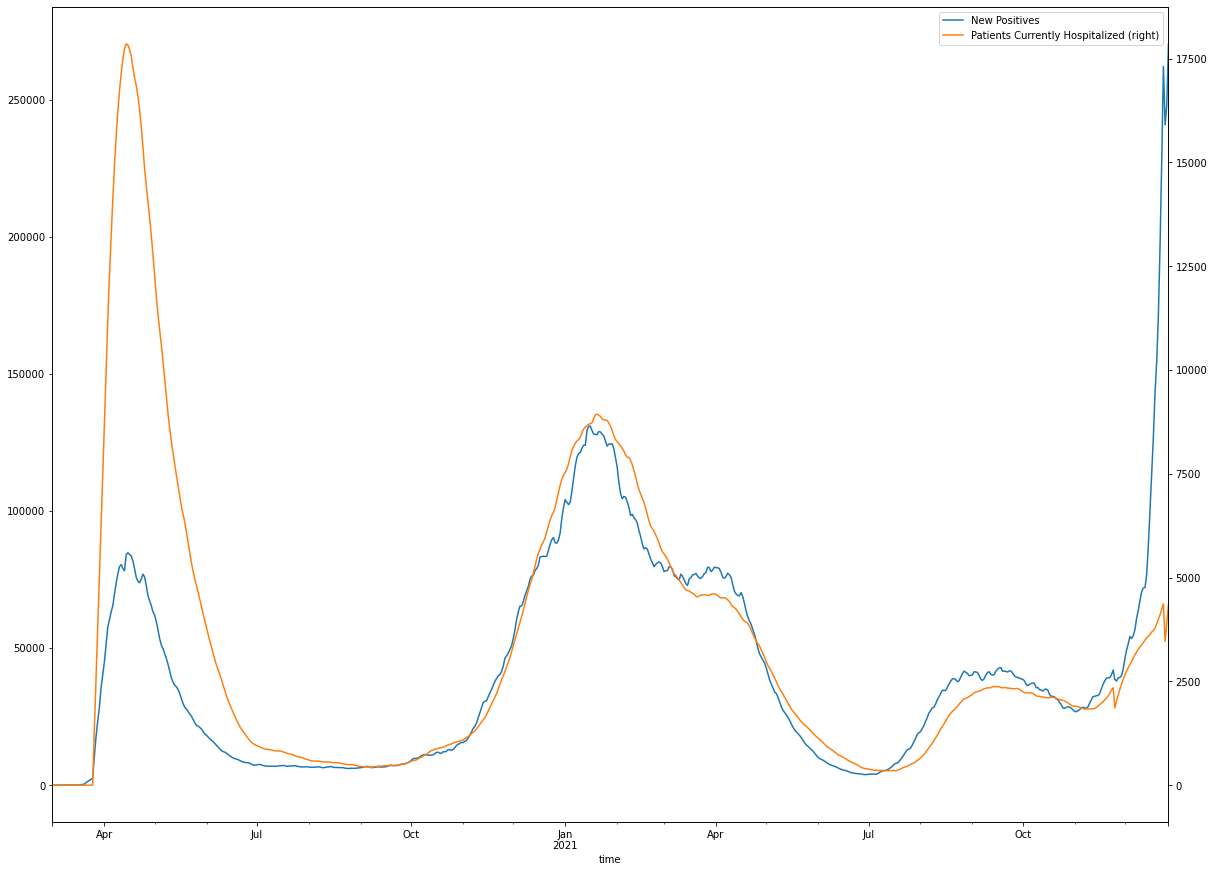

In [18]:
plotdata = data.groupby(level=0).sum()
plotdata['New Positives'].ewm(halflife=pandas.Timedelta(days=7), times=plotdata.index).mean().plot(figsize=(20, 15), legend=True)
plotdata['Patients Currently Hospitalized'].ewm(halflife=pandas.Timedelta(days=3), times=plotdata.index).mean().plot(secondary_y=True, legend=True)